Importing the Dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from datetime import datetime

Import the dataset from csv file into a pandas dataframe

In [20]:
tracks = pd.read_csv('https://raw.githubusercontent.com/fnudiana/Popularity-Regression/main/DF3-2.csv')
tracks = tracks.iloc[:, 1:]

In [21]:
tracks

,title,week_on_chart,last_week,external_urls,num_of_artists,count_available_markets,disc_number,song_duration,popularity,track_num,total_track,release_date
0,DIE FOR YOU THE WEEKND FEAT. ARIANA GRANDE,38,1.0,{'spotify': 'https://open.spotify.com/album/4A...,1,184,1,260.253,90,17,18,2016-11-24
1,BADAI TELAH BERLALU DISKORIA FEAT BCL,35,2.0,{'spotify': 'https://open.spotify.com/album/1p...,3,184,1,295.542,71,1,1,2023-01-20
2,SEVEN JUNGKOOK FEAT. LATTO,17,3.0,{'spotify': 'https://open.spotify.com/album/53...,2,184,1,184.400,92,2,3,2023-07-14
3,SUPERSHY NEWJEANS,19,4.0,{'spotify': 'https://open.spotify.com/album/5V...,1,184,1,154.666,90,2,2,2023-07-07
4,CINCIN HINDIA,14,5.0,{'spotify': 'https://open.spotify.com/album/2k...,1,184,1,266.330,80,9,14,2023-07-07
5,3D JUNGKOOK FEAT. JACK HARLOW,6,7.0,{'spotify': 'https://open.spotify.com/album/5p...,1,184,1,206.019,97,4,11,2023-11-03
6,RAYUAN PEREMPUAN GILA NADIN AMIZAH,7,8.0,{'spotify': 'https://open.spotify.com/album/7c...,1,184,1,320.000,79,1,1,2023-06-23
7,WHAT I WAS MADE FOR BILLIE EILISH,17,9.0,{'spotify': 'https://open.spotify.com/album/3A...,1,183,1,222.369,93,1,1,2023-07-13
8,MY LOVE MINE ALL MINE MITSKI,8,10.0,{'spotify': 'https://open.spotify.com/album/2C...,1,184,1,137.773,98,7,11,2023-09-15
9,ALWAYS DANIEL CAESAR,29,11.0,{'spotify': 'https://open.spotify.com/album/7i...,1,183,1,225.312,84,6,15,2023-04-07


In [22]:
# Make New Column for Duration Since Release Date

tracks['release_date'] = pd.to_datetime(tracks['release_date'])
tracks['curr_date'] = datetime.now()
tracks['from_release_date_till_now'] = (tracks['curr_date'] - tracks['release_date'])

In [23]:
# Get duration in days

tracks['duration_release'] = 0
for i in range(len(tracks)):
  tracks['duration_release'][i] = tracks['from_release_date_till_now'][i].days

<ipython-input-23-61d21f08764a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['duration_release'][i] = tracks['from_release_date_till_now'][i].days


In [24]:
# Filter Features for Regression

tracks = tracks[['last_week','week_on_chart', 'num_of_artists', 'count_available_markets', 'disc_number', 'song_duration', 'track_num',
             'total_track', 'duration_release', 'popularity']]

In [25]:
tracks = tracks.fillna(method = 'backfill')
tracks

,last_week,week_on_chart,num_of_artists,count_available_markets,disc_number,song_duration,track_num,total_track,duration_release,popularity
0,1.0,38,1,184,1,260.253,17,18,2582,90
1,2.0,35,3,184,1,295.542,1,1,334,71
2,3.0,17,2,184,1,184.400,2,3,159,92
3,4.0,19,1,184,1,154.666,2,2,166,90
4,5.0,14,1,184,1,266.330,9,14,166,80
5,7.0,6,1,184,1,206.019,4,11,47,97
6,8.0,7,1,184,1,320.000,1,1,180,79
7,9.0,17,1,183,1,222.369,1,1,160,93
8,10.0,8,1,184,1,137.773,7,11,96,98
9,11.0,29,1,183,1,225.312,6,15,257,84


Generate correlation metrix

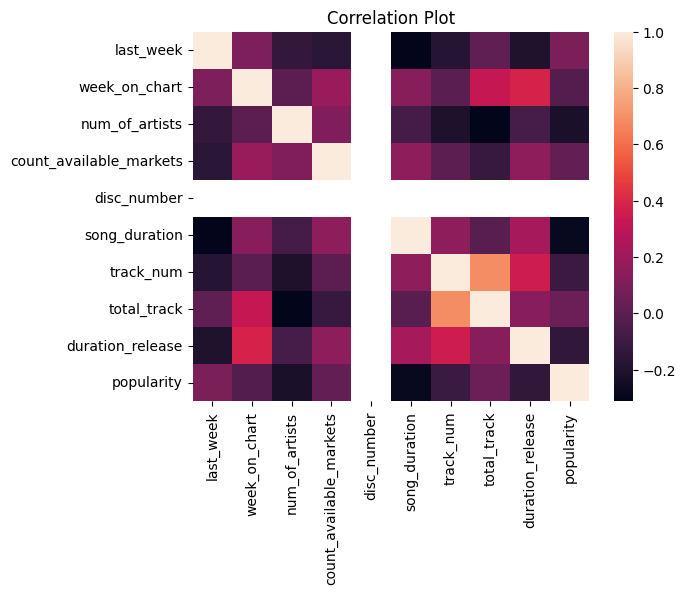

In [26]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

sns.heatmap(tracks.corr())
plt.title("Correlation Plot")
plt.show()

What features do we have in our dataset?

In [27]:
tracks.columns

Index(['last_week', 'week_on_chart', 'num_of_artists',
       'count_available_markets', 'disc_number', 'song_duration', 'track_num',
       'total_track', 'duration_release', 'popularity'],
      dtype='object')

How much data do we have?

In [28]:
tracks.shape

(40, 10)

What data types do we have?

In [29]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   last_week                40 non-null     float64
 1   week_on_chart            40 non-null     int64  
 2   num_of_artists           40 non-null     int64  
 3   count_available_markets  40 non-null     int64  
 4   disc_number              40 non-null     int64  
 5   song_duration            40 non-null     float64
 6   track_num                40 non-null     int64  
 7   total_track              40 non-null     int64  
 8   duration_release         40 non-null     int64  
 9   popularity               40 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 3.2 KB


Do we have any missing values?

In [30]:
tracks.isnull().sum()

last_week                  0
week_on_chart              0
num_of_artists             0
count_available_markets    0
disc_number                0
song_duration              0
track_num                  0
total_track                0
duration_release           0
popularity                 0
dtype: int64

How does the market availibility vary?

In [31]:
tracks.count_available_markets.value_counts()

184    18
183    16
146     3
182     2
180     1
Name: count_available_markets, dtype: int64

How does the track number vary?

In [32]:
print(tracks['track_num'].value_counts())

1     21
2      4
4      3
7      3
17     2
8      2
3      2
9      1
6      1
10     1
Name: track_num, dtype: int64


Visualize the distribution of the track num

<Axes: title={'center': 'Pie Chart Showing Market Available Distribution'}, ylabel='count_available_markets'>

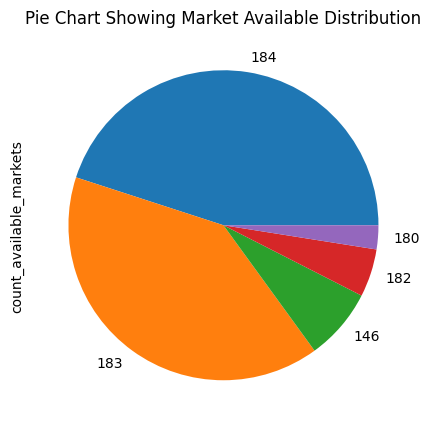

In [33]:
data = tracks.count_available_markets.value_counts()
plt.figure(figsize= (5, 10))
data.plot.pie(title='Pie Chart Showing Market Available Distribution')

Visualize the distribution of the track number

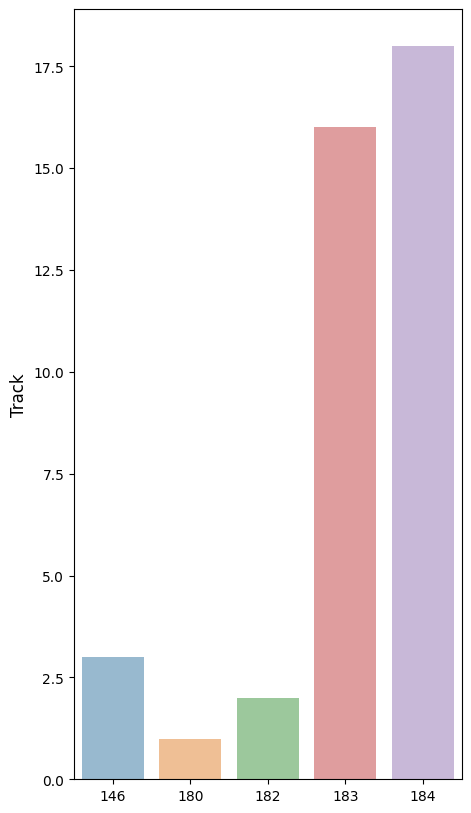

In [34]:
track_number = tracks.count_available_markets.value_counts()
plt.figure(figsize= (5, 10))
sns.barplot(x= track_number.index, y= track_number.values, alpha= 0.5)
plt.title=('Distribution of the Track Number')
plt.ylabel('Number of Track Available', fontsize = 12)
plt.ylabel('Track', fontsize = 12)
plt.show()

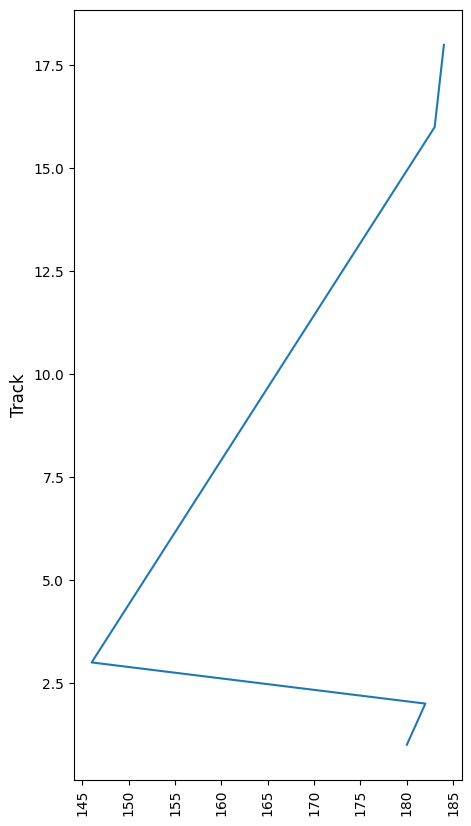

In [51]:
track_number = tracks.count_available_markets.value_counts()
plt.figure(figsize= (5, 10))
plt.title=('Distribution of the Track Number')
plt.ylabel('Number of Track Available', fontsize = 12)
plt.ylabel('Track', fontsize = 12)
plt.xticks(rotation=90)
plt.plot(track_number.index, track_number.values)
plt.show()

We will now separate our data into features(X) and targets(Y)

In [35]:
X = tracks.drop(['popularity'], axis = 1)
y = tracks['popularity']

Splitting the dataset into training and tests sets in the ratio 70/30

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =2)

Create the model and fit (train) on the training data

In [37]:
from sklearn.linear_model import LinearRegression

#Load the linear regression model
LR = LinearRegression ()

LR.fit(X_train, y_train)

LinearRegression()

Make Predictions on the test data

In [38]:
#model evaluation
#test our model on our test data
y_pred = LR.predict(X_test)

Calculating the Coefficients

In [39]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [-5.39792804e-02  3.58217481e-02 -8.29060027e+00  2.26565278e-01
 -4.88498131e-15 -4.59197597e-02 -1.55340448e+00  2.68709724e-01
 -8.33692469e-03]


Calculate the intercept

In [40]:
intercept = LR.intercept_
print(f'Intercept {intercept}')

Intercept 68.4449556332086


Calculating R squared

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: -7.715675639044548


Calculating the MSE

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 209.84199611505167


Calculating RMSE

In [43]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 14.485924068386238


Calculating the MAE

In [44]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 9.198889166176013


In [45]:
y_pred

array([70.68762734, 84.28221621, 90.0519512 , 48.10181768, 81.90494355,
       76.18149289, 89.23373026, 81.37102433, 81.51279732, 93.54647703,
       73.76385559, 80.84229227])

Export the model as pickle

In [46]:
import pickle
with open('popularity_prediction', 'wb') as f:
  pickle.dump(LR, f)